In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Student_Performance.csv')
df = pd.DataFrame(data)


label_encoder = LabelEncoder()
df['Extracurricular Activities'] = label_encoder.fit_transform(df['Extracurricular Activities'])

#independent variables as (X) and dependent variable as (y)
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

#Split datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the linear regression model
model = LinearRegression()

#Fit the model on the training data
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

#R² Score
r2_score = model.score(X_test, y_test)
print(f"R² Score: {r2_score}")


Mean Squared Error: 4.082628398521853
Coefficients: [2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]
Intercept: -33.921946215556126
R² Score: 0.9889832909573145


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('Student_Performance.csv')
df = pd.DataFrame(data)

df['Extracurricular Activities'] = df['Extracurricular Activities'].apply(lambda x:1 if x == 'Yes' else 0)

In [34]:
#Extract features (X) and target variable (y)
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']].values
y = df['Performance Index'].values

In [35]:
X = np.c_[np.ones(X.shape[0]),X]

theta = np.zeros(X.shape[1])

In [36]:
y_hat = np.dot(X,theta)

print('Predicted value {}',y_hat)

Predicted value {} [0. 0. 0. ... 0. 0. 0.]


In [37]:
def compute_cost(X, y , theta):
    m = len(y)
    prediction = np.dot(X, theta)
    cost_calculate = (1/(2*m))* np.sum(np.square(y-prediction))

    return cost_calculate

initial_cost = compute_cost(X, y, theta)
print("Initial Cost (MSE):", initial_cost)

Initial Cost (MSE): 1709.432


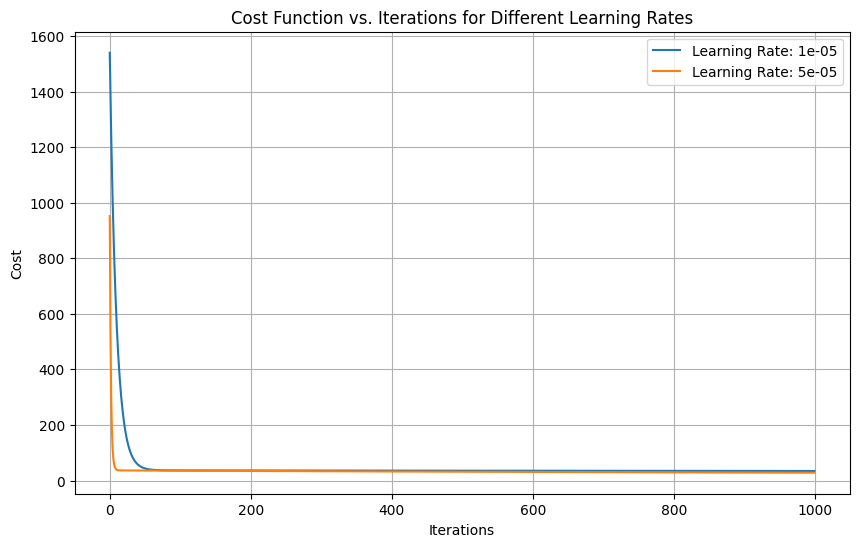

Optimized Parameters: [-0.03818725  0.63906676  0.78484204 -0.0100706  -0.1705372  -0.06845521]
Final Cost: 28.012187334807596


In [39]:
#Gradient descent

def gradient_descent(X, y , theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = np.dot(X,theta)

        theta = theta - (learning_rate/m) * np.dot(X.T, (predictions-y))

        cost = compute_cost(X,y,theta)
        cost_history.append(cost)

    return theta, cost_history

#Learning rates to test
learning_rates = [0.00001, 0.00005]
iterations = 1000

#Plotting the cost for each learning rate
plt.figure(figsize=(10, 6))

for lr in learning_rates:
    theta_opt, cost_history = gradient_descent(X, y, theta.copy(), lr, iterations)
    plt.plot(range(iterations), cost_history, label=f"Learning Rate: {lr}")

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iterations for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

print("Optimized Parameters:", theta_opt)
print("Final Cost:", cost_history[-1])

In [40]:
final_prediction = np.dot(X, theta_opt)

final_mse = np.mean((final_prediction - y) ** 2)
print("Final Mean Squared Error:", final_mse)

Final Mean Squared Error: 56.02437466961519


In [41]:
# Compute R² score
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - final_prediction) ** 2)
r2_score = 1 - (ss_residual / ss_total)
print("R² Score:", r2_score)

R² Score: 0.848207583369107
